<a href="https://colab.research.google.com/github/AmindaUdayanga/Feature-Engineered-Rice-yield-Prediction-based-on-Weather-Data/blob/master/feature_engineered_Kurunegala_Yala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from array import *
import math
# improve Random Forest application
from sklearn.model_selection import GridSearchCV

##All datasets

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/ML_research/Am.csv')
dataset1="Anuradhapura maha kannaya"

In [4]:
df2 = pd.read_csv('/content/drive/MyDrive/ML_research/Ay.csv')
dataset2="Anuradhapura yala kannaya"

In [5]:
df3 = pd.read_csv('/content/drive/MyDrive/ML_research/Km.csv')
dataset3="Kurunegala maha kannaya"

In [6]:
df4 = pd.read_csv('/content/drive/MyDrive/ML_research/Ky.csv')
dataset4="Kurunegala yala kannaya"

In [7]:
#"Kurunegala yala kannaya"
df = df4

dataset=dataset4
print(df)

    year          X1         X2         X3         X4   X5  X6  X7   X8   X9  \
0   1982  639.600000  30.594059  33.550000  28.680000  101  12  10   27   96   
1   1983  431.300000  31.305102  33.816000   0.000000   98  25   0   16  107   
2   1984  284.900000  30.709184  33.600000  28.390000   98  15  10   30   93   
3   1985  662.900000  30.158537  34.126667  28.396154   82  15  26   29   94   
4   1986  230.500000  31.207407  33.625000  28.518182  108   4  11   26   97   
5   1987  510.500000  31.073077  33.905556  28.100000  104  18   1   21  102   
6   1988  637.200000  30.839450  33.500000  28.633333  109   5   9   21  102   
7   1989  597.011765  30.436547  33.600000  28.169231  103   7  13   27   96   
8   1990  409.400000  30.702941  34.433333  28.200000  102   3  18   13  110   
9   1991  552.800000  30.642391  33.665217  28.512500   92  23   8   18  105   
10  1992  457.900000  30.516129  33.537500  28.222727   93   8  22   49   74   
11  1993  505.800000  30.564078  33.5857

##pre processing

In [8]:
#Delete row whose column value is equal to 0
df = df.drop(df.index[df['X2'] == 0])
df = df.drop(df.index[df['X3'] == 0])
df = df.drop(df.index[df['X4'] == 0])
df = df.drop(df.index[df['X10'] == 0])
df = df.drop(df.index[df['X11'] == 0])
df.size

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
print(df)

    year          X1         X2         X3         X4   X5  X6  X7  X8   X9  \
0   1982  639.600000  30.594059  33.550000  28.680000  101  12  10  27   96   
2   1984  284.900000  30.709184  33.600000  28.390000   98  15  10  30   93   
3   1985  662.900000  30.158537  34.126667  28.396154   82  15  26  29   94   
4   1986  230.500000  31.207407  33.625000  28.518182  108   4  11  26   97   
5   1987  510.500000  31.073077  33.905556  28.100000  104  18   1  21  102   
6   1988  637.200000  30.839450  33.500000  28.633333  109   5   9  21  102   
7   1989  597.011765  30.436547  33.600000  28.169231  103   7  13  27   96   
8   1990  409.400000  30.702941  34.433333  28.200000  102   3  18  13  110   
9   1991  552.800000  30.642391  33.665217  28.512500   92  23   8  18  105   
10  1992  457.900000  30.516129  33.537500  28.222727   93   8  22  49   74   
11  1993  505.800000  30.564078  33.585714  28.476923  103   7  13  56   67   
12  1994  313.382353  30.614141  33.671429  28.44000

<Axes: >

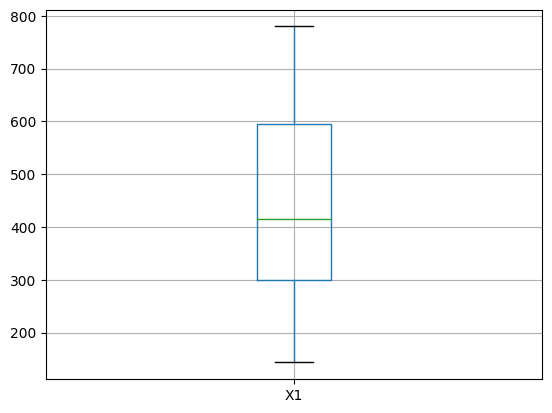

In [9]:
df.boxplot(column=['X1'])

<Axes: >

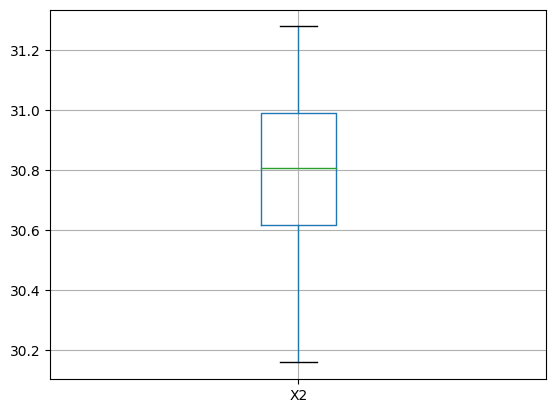

In [10]:
df.boxplot(column=['X2'])


<Axes: >

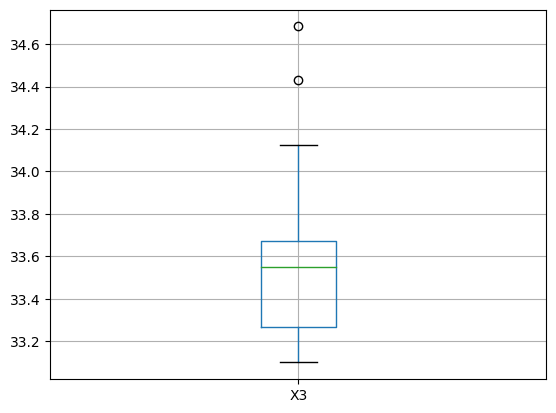

In [11]:
df.boxplot(column=['X3'])


<Axes: >

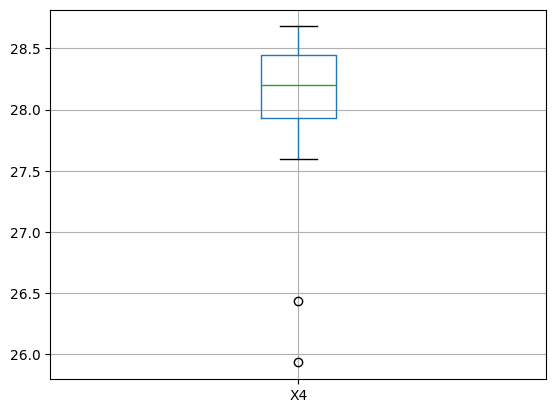

In [12]:
df.boxplot(column=['X4'])


<Axes: >

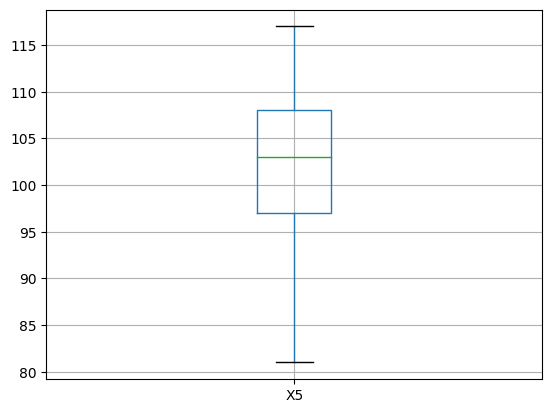

In [13]:
df.boxplot(column=['X5'])


<Axes: >

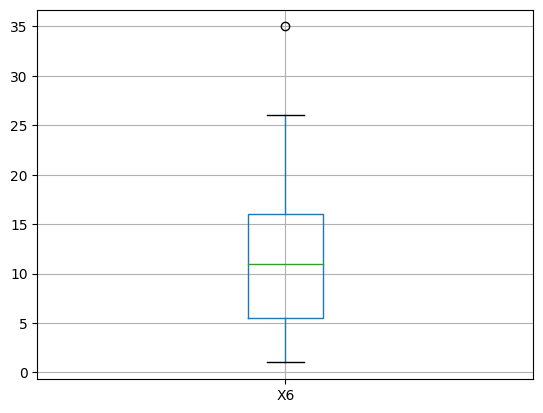

In [14]:
df.boxplot(column=['X6'])


<Axes: >

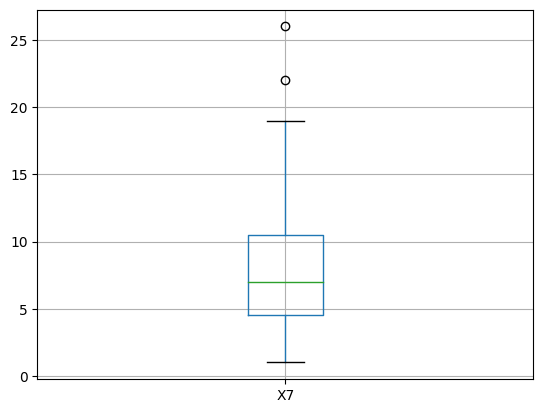

In [15]:
df.boxplot(column=['X7'])


<Axes: >

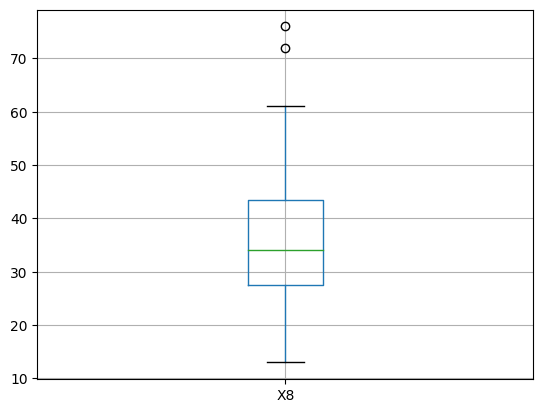

In [16]:
df.boxplot(column=['X8'])


<Axes: >

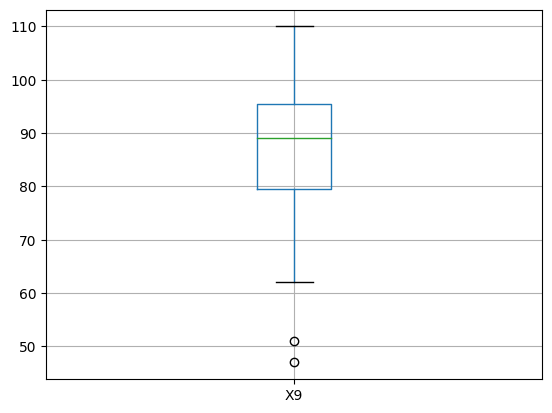

In [17]:
df.boxplot(column=['X9'])


<Axes: >

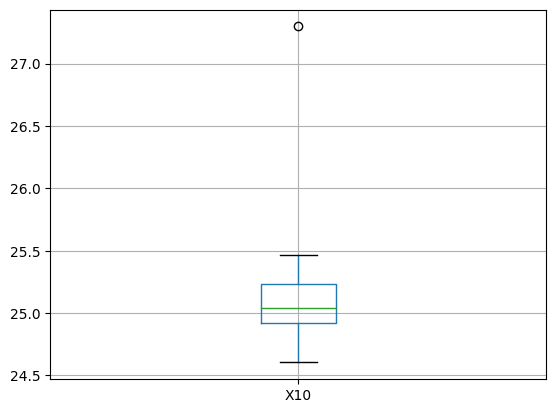

In [18]:
df.boxplot(column=['X10'])


<Axes: >

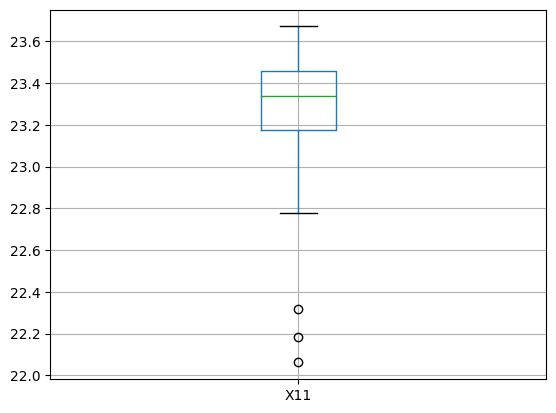

In [19]:
df.boxplot(column=['X11'])

In [20]:
df['X1'] = np.where(df['X1'] < (df['X1'].quantile(0.10)), (df['X1'].quantile(0.10)),df['X1'])
df['X1'] = np.where(df['X1'] >(df['X1'].quantile(0.90)), (df['X1'].quantile(0.90)),df['X1'])

df['X2'] = np.where(df['X2'] < (df['X2'].quantile(0.10)), (df['X2'].quantile(0.10)),df['X2'])
df['X2'] = np.where(df['X2'] >(df['X2'].quantile(0.90)), (df['X2'].quantile(0.90)),df['X2'])

df['X3'] = np.where(df['X3'] < (df['X3'].quantile(0.10)), (df['X3'].quantile(0.10)),df['X3'])
df['X3'] = np.where(df['X3'] >(df['X3'].quantile(0.90)), (df['X3'].quantile(0.90)),df['X3'])

df['X4'] = np.where(df['X4'] < (df['X4'].quantile(0.10)), (df['X4'].quantile(0.10)),df['X4'])
df['X4'] = np.where(df['X4'] >(df['X4'].quantile(0.90)), (df['X4'].quantile(0.90)),df['X4'])

df['X5'] = np.where(df['X5'] < (df['X5'].quantile(0.10)), (df['X5'].quantile(0.10)),df['X5'])
df['X5'] = np.where(df['X5'] >(df['X5'].quantile(0.90)), (df['X5'].quantile(0.90)),df['X5'])

df['X6'] = np.where(df['X6'] < (df['X6'].quantile(0.10)), (df['X6'].quantile(0.10)),df['X6'])
df['X6'] = np.where(df['X6'] >(df['X6'].quantile(0.90)), (df['X6'].quantile(0.90)),df['X6'])

df['X7'] = np.where(df['X7'] < (df['X7'].quantile(0.10)), (df['X7'].quantile(0.10)),df['X7'])
df['X7'] = np.where(df['X7'] >(df['X7'].quantile(0.90)), (df['X7'].quantile(0.90)),df['X7'])

df['X8'] = np.where(df['X8'] < (df['X8'].quantile(0.10)), (df['X8'].quantile(0.10)),df['X8'])
df['X8'] = np.where(df['X8'] >(df['X8'].quantile(0.90)), (df['X8'].quantile(0.90)),df['X8'])

df['X9'] = np.where(df['X9'] < (df['X9'].quantile(0.10)), (df['X9'].quantile(0.10)),df['X9'])
df['X9'] = np.where(df['X9'] >(df['X9'].quantile(0.90)), (df['X9'].quantile(0.90)),df['X9'])

df['X10'] = np.where(df['X10'] < (df['X10'].quantile(0.10)), (df['X10'].quantile(0.10)),df['X10'])
df['X10'] = np.where(df['X10'] >(df['X10'].quantile(0.90)), (df['X10'].quantile(0.90)),df['X10'])

df['X11'] = np.where(df['X11'] < (df['X11'].quantile(0.10)), (df['X11'].quantile(0.10)),df['X11'])
df['X11'] = np.where(df['X11'] >(df['X11'].quantile(0.90)), (df['X11'].quantile(0.90)),df['X11'])

In [21]:

def bias_value(y_test, y_pred):
  ytest_list = list(y_test.values)
  diff=0.0
  avg_diff=0.0
  for i in range(0,len(ytest_list)):
    diff=diff+ytest_list[i]-y_pred[i]

  avg_diff=diff/len(ytest_list)
  return avg_diff

data = {'Method': ['Linear Regression','SVR','MLP','KNN','Random Forest'],
        'RMSE test': [0,0,0,0,0],
        'RMSE train': [0,0,0,0,0],
        'RRMSE test': [0,0,0,0,0],
        'RRMSE train': [0,0,0,0,0],
        'MAE test': [0,0,0,0,0],
        'MAE train': [0,0,0,0,0],
        'R2_score test': [0,0,0,0,0],
        'R2_score train': [0,0,0,0,0],
        'Bias test': [0,0,0,0,0],
        'Bias train': [0,0,0,0,0],
        }
test_acc = {'Method': ['Linear Regression','SVR','MLP','KNN','Random Forest'],
        'RMSE test': [0,0,0,0,0],
        'RRMSE test': [0,0,0,0,0],
        'MAE test': [0,0,0,0,0],
        'R2_score test': [0,0,0,0,0],
        'Bias test': [0,0,0,0,0]
        }
df_train = pd.DataFrame(data, columns = ['Method', 'RMSE test','RMSE train','RRMSE test','RRMSE train','MAE test','MAE train','R2_score test','R2_score train','Bias test','Bias train'])

test_percentage = 0.3
test_size = math.floor(len(df.index)*test_percentage)


df_train = df[:-test_size]
df_test = df[-test_size:]


Feature: 0, Score: 0.02862
Feature: 1, Score: 0.03547
Feature: 2, Score: 0.05162
Feature: 3, Score: 0.53177
Feature: 4, Score: 0.07631
Feature: 5, Score: 0.05098
Feature: 6, Score: 0.05426
Feature: 7, Score: 0.05092
Feature: 8, Score: 0.04402
Feature: 9, Score: 0.03425
Feature: 10, Score: 0.04178


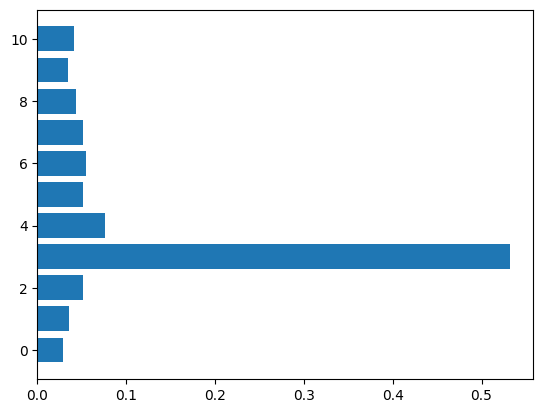

[[0, 0.028620218612369863], [1, 0.03547025590725611], [2, 0.051617063190256184], [3, 0.5317689969891107], [4, 0.07630734672199521], [5, 0.05098226551791129], [6, 0.05426379064290176], [7, 0.05092144577280784], [8, 0.044020699745528837], [9, 0.03425050547778725], [10, 0.041777411422074855]]


In [22]:
#Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

X=df_train.drop(['year','prod'], axis=1)
y=df_train['prod']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

feature_names = [f"feature {i}" for i in range(X.shape[1])]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(X_train)
X_test = scaler.transform(x_test)
x_test = pd.DataFrame(X_test)

rf = RandomForestRegressor(random_state=42)

rf.fit(x_train,y_train)

importance = rf.feature_importances_
# summarize feature importance and assign them to an array 'arr' with the feature index
arr = [[0 for x in range(2)] for y in range(11)]
for i,v in enumerate(importance):
	arr[i][0] = i
	arr[i][1] = v
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.barh([x for x in range(len(importance))], importance)
plt.show()

print(arr)


[[3, 0.5317689969891107], [4, 0.07630734672199521], [6, 0.05426379064290176], [2, 0.051617063190256184], [5, 0.05098226551791129], [7, 0.05092144577280784], [8, 0.044020699745528837], [10, 0.041777411422074855], [1, 0.03547025590725611], [9, 0.03425050547778725], [0, 0.028620218612369863]]


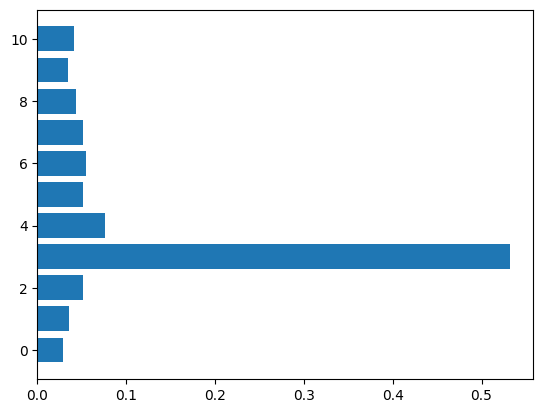

In [23]:
arr.sort(key=lambda row: (row[1]), reverse=True)
print(arr)
plt.barh([x[0] for x in arr],[x[1] for x in arr])
plt.show()


Feature: 1, Score: 0.02862
Feature: 10, Score: 0.03425
Feature: 2, Score: 0.03547
Feature: 11, Score: 0.04178
Feature: 9, Score: 0.04402
Feature: 8, Score: 0.05092
Feature: 6, Score: 0.05098
Feature: 3, Score: 0.05162
Feature: 7, Score: 0.05426
Feature: 5, Score: 0.07631
Feature: 4, Score: 0.53177


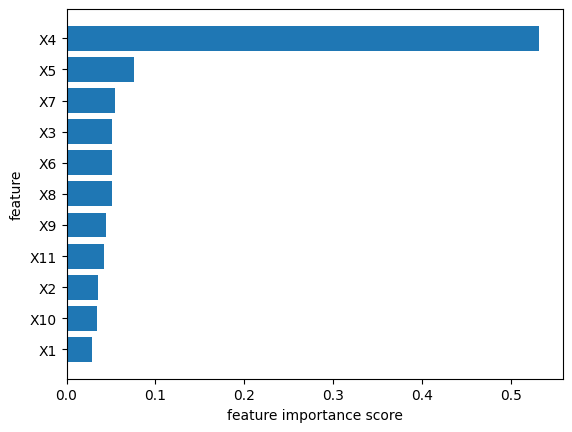

In [24]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

X=df_train.drop(['year','prod'], axis=1)
y=df_train['prod']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

feature_names = [f"feature {i}" for i in range(X.shape[1])]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(X_train)
X_test = scaler.transform(x_test)
x_test = pd.DataFrame(X_test)

rf = RandomForestRegressor(random_state=42)

rf.fit(x_train,y_train)

importance = rf.feature_importances_
# summarize feature importance and assign them to an list 'list_' with the feature index
list_ = [[0 for x in range(2)] for y in range(11)]
dic = {}
indexes=[]
values=[]
for i,v in enumerate(importance):
	dic[i+1] = v

# plot feature importance
sorted_list = sorted(dic.items(), key=lambda x:x[1],reverse=False)

sorted_dic = dict()
for item in sorted_list:
	sorted_dic[item[0]]=item[1]
	indexes.append(item[0])
	values.append(item[1])
	print('Feature: %0d, Score: %.5f' % (item[0],item[1]))
plt.barh([f'X{x}' for x in indexes], [val for val in  values])
plt.xlabel("feature importance score")
plt.ylabel("feature")
plt.savefig("KY_features.jpg",dpi=1200)
plt.show()


In [25]:
acc_array=list()
#feature_array=list()


cv = KFold(n_splits=5, shuffle=True, random_state=42)

for n in range(1,12):
  num_of_features = n
  #print(num_of_features)
  selected = [0 for y in range(num_of_features)]
  for i in range(num_of_features):
    selected[i] = sorted(arr,key=lambda row: (row[1]), reverse=True)[i]
  print(selected)
  selected_features_list = [0 for y in range(num_of_features)]
  for i in range(num_of_features):
    selected_features_list[i] = df_train.columns[selected[i][0]+1]
  print(selected_features_list)

[[3, 0.5317689969891107]]
['X4']
[[3, 0.5317689969891107], [4, 0.07630734672199521]]
['X4', 'X5']
[[3, 0.5317689969891107], [4, 0.07630734672199521], [6, 0.05426379064290176]]
['X4', 'X5', 'X7']
[[3, 0.5317689969891107], [4, 0.07630734672199521], [6, 0.05426379064290176], [2, 0.051617063190256184]]
['X4', 'X5', 'X7', 'X3']
[[3, 0.5317689969891107], [4, 0.07630734672199521], [6, 0.05426379064290176], [2, 0.051617063190256184], [5, 0.05098226551791129]]
['X4', 'X5', 'X7', 'X3', 'X6']
[[3, 0.5317689969891107], [4, 0.07630734672199521], [6, 0.05426379064290176], [2, 0.051617063190256184], [5, 0.05098226551791129], [7, 0.05092144577280784]]
['X4', 'X5', 'X7', 'X3', 'X6', 'X8']
[[3, 0.5317689969891107], [4, 0.07630734672199521], [6, 0.05426379064290176], [2, 0.051617063190256184], [5, 0.05098226551791129], [7, 0.05092144577280784], [8, 0.044020699745528837]]
['X4', 'X5', 'X7', 'X3', 'X6', 'X8', 'X9']
[[3, 0.5317689969891107], [4, 0.07630734672199521], [6, 0.05426379064290176], [2, 0.05161706

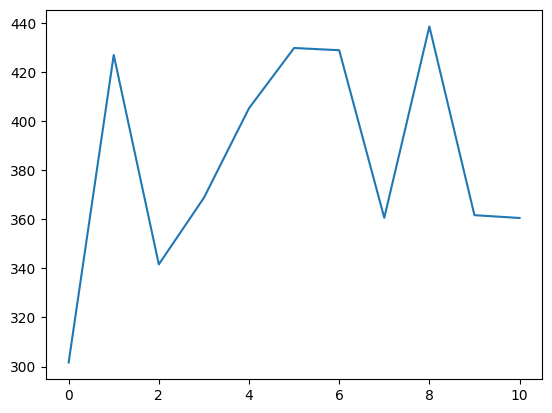

['X4']
301.65819999999997


In [26]:

acc_array=list()
#feature_array=list()


cv = KFold(n_splits=5, shuffle=True, random_state=42)
min=2000
selected_features_final=list()
for n in range(1,12):
  num_of_features = n
  selected = [[0 for x in range(2)] for y in range(num_of_features)]
  #copy the selected most important n features' indices and their importance to 'selected' array
  for i in range(num_of_features):
    selected[i] = sorted(arr,key=lambda row: (row[1]), reverse=True)[i]
  #assign selected feature columns in 'X' dataset to new dataset 'selected_features'
  selected_features = pd.DataFrame()
  selected_features_list = [0 for y in range(num_of_features)]
  for i in range(num_of_features):
    selected_features[i] = df_train.iloc[:, selected[i][0]+1]
    #print(selected_features)
    selected_features_list[i] = df_train.columns[selected[i][0]+1]
  #print(selected_features_list)
  rmse_test_arr = []
  rrmse_test_arr =[]
  r2_test_arr= []
  mae_test_arr = []

  rmse_train_arr = []
  rrmse_train_arr =[]
  r2_train_arr= []
  mae_train_arr = []

  bias_test_arr = []
  bias_train_arr = []
  #print(selected_features[i])
  for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = selected_features[i].iloc[tr], selected_features[i].iloc[tt]
    y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
    #print(tr,tt)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(pd.DataFrame(x_train))
    X_test = scaler.transform(pd.DataFrame(x_test))
    model =  RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

    #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

  acc_array.append(np.mean(np.array(rmse_test_arr).astype(np.float64)))
  if(min > np.mean(np.array(rmse_test_arr).astype(np.float64))):
    min=np.mean(np.array(rmse_test_arr).astype(np.float64))
    selected_features_final = selected_features_list
plt.plot(np.arange(11), acc_array)
plt.show()
print(selected_features_final)
print(min)

##LinearRegression

[ 1  2  3  4  5  6  7  9 10 12 13 14 15 17 18 19 20 21 22 24] [ 0  8 11 16 23]
[ 0  2  3  4  6  7  8 10 11 12 14 15 16 17 18 19 20 21 23 24] [ 1  5  9 13 22]
[ 0  1  5  6  7  8  9 10 11 13 14 16 17 18 19 20 21 22 23 24] [ 2  3  4 12 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 19 22 23] [17 18 20 21 24]
[ 0  1  2  3  4  5  8  9 11 12 13 15 16 17 18 20 21 22 23 24] [ 6  7 10 14 19]
[370.893, 342.085, 88.126, 219.48, 260.48]
256.21279999999996


<BarContainer object of 5 artists>

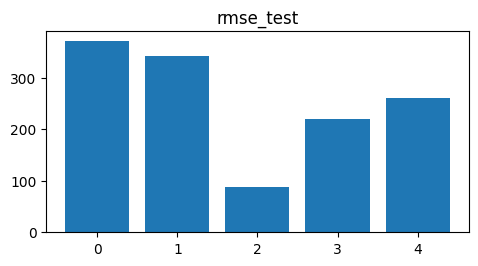

In [27]:
cv = KFold(n_splits=5, shuffle=True,random_state=42)

rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []

for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
    print(tr,tt)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)
    model = LinearRegression().fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)

    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

    #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][0]='Linear Regression'
data['RMSE test'][0]=np.mean(rmse_test_arr)
data['RMSE train'][0]=np.mean(rmse_train_arr)
data['RRMSE test'][0]=np.mean(np.array(rrmse_test_arr).astype(np.float64))
data['RRMSE train'][0]=np.mean(np.array(rrmse_train_arr).astype(np.float64))
data['MAE test'][0]=np.mean(mae_test_arr)
data['MAE train'][0]=np.mean(mae_train_arr)
data['R2_score test'][0]=np.mean(r2_test_arr)
data['R2_score train'][0]=np.mean(r2_train_arr)
data['Bias test'][0]=np.mean(bias_test_arr)
data['Bias train'][0]=np.mean(bias_train_arr)

#print(np.array(rmse_test_arr).astype(np.float64))
print(rmse_test_arr)
print(sum(rmse_test_arr)/5)
plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

[0, 1, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24] [2, 3, 4, 12, 15]

RMSE test:  636.791

RRMSE test:  17.23 %


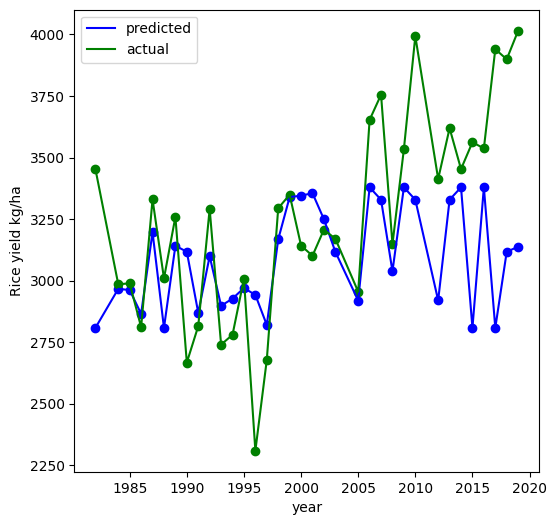

In [28]:
tr = [ 0 , 1,  5,  6,  7 , 8 , 9 ,10 ,11, 13, 14, 16, 17, 18 ,19 ,20, 21, 22 ,23 ,24]
tt = [ 2 ,3 , 4 ,12 ,15]
x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
model = LinearRegression().fit(X_train, y_train)
x_ = df_test[selected_features_final]
y_ = df_test['prod']
y_pred_ = model.predict(scaler.transform(x_))

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")


x__=df[selected_features_final]
y__=df['prod']
y__pred__=model.predict(scaler.transform(x__))

plt.figure(figsize=(6,6))
plt.scatter(df['year'], y__pred__,color='b')
plt.plot(df['year'],y__pred__,color='b',label='predicted')
plt.scatter(df['year'],y__,color='g')
plt.plot(df['year'],y__,color='g',label='actual')
plt.xlabel("year")
plt.ylabel("Rice yield kg/ha")
plt.legend()
plt.show()

test_acc['Method'][0]='Linear Regression'
test_acc['RMSE test'][0]=rmse_test
test_acc['RRMSE test'][0]=rrmse_test
test_acc['MAE test'][0]=float(format(mean_absolute_error(y_pred_, y_), '.3f'))
test_acc['R2_score test'][0]=r2_score(y_,y_pred_)
test_acc['Bias test'][0]=bias_value(y_,y_pred_)

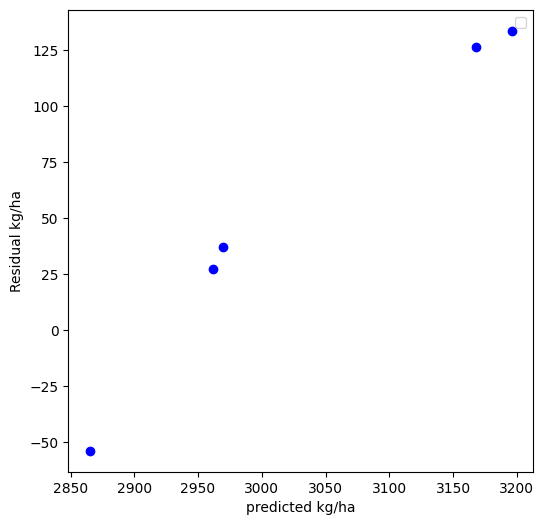

In [29]:
x_val = df_train[selected_features_final].iloc[tt]
y_val = df_train['prod'].iloc[tt]
y_pred_val = model.predict(scaler.transform(x_val))

plt.figure(figsize=(6,6))
plt.scatter(y_pred_val, y_val-y_pred_val, color='b')
#plt.plot(df_test['year'], y_-y_pred_,color='b')
plt.xlabel("predicted kg/ha")
plt.ylabel("Residual kg/ha")
plt.legend()


plt.show()

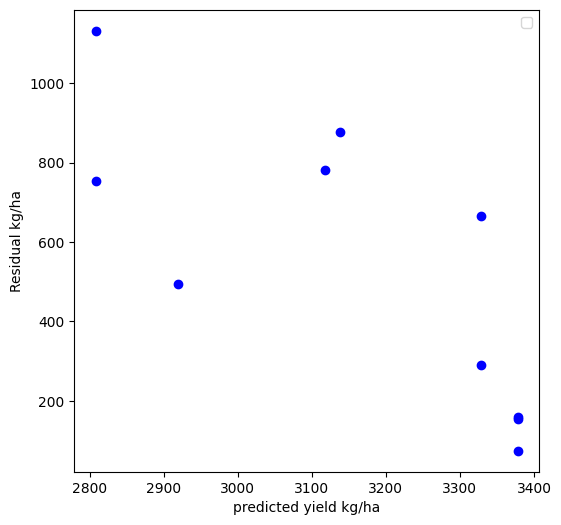

In [30]:
x_val = df_test[selected_features_final]
y_val = df_test['prod']
y_pred_val = model.predict(scaler.transform(x_val))

plt.figure(figsize=(6,6))
plt.scatter(y_pred_val, y_val-y_pred_val, color='b')
#plt.plot(df_test['year'], y_-y_pred_,color='b')
plt.xlabel("predicted yield kg/ha")
plt.ylabel("Residual kg/ha")
plt.legend()
plt.savefig("KY_LR_res.jpg",dpi=1200)

plt.show()

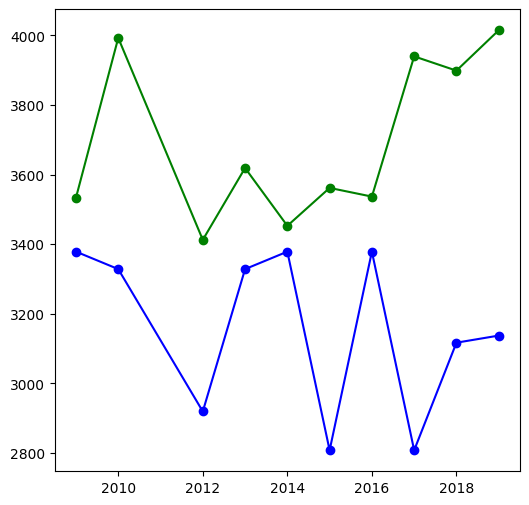

In [31]:
plt.figure(figsize=(6,6))
plt.scatter(df_test['year'], y_pred_,color='b')
plt.plot(df_test['year'],y_pred_,color='b')
plt.scatter(df_test['year'],y_,color='g')
plt.plot(df_test['year'],y_,color='g')
plt.savefig("KY_LR_pred.jpg",dpi=1200)
plt.show()


##SVR

[ 1  2  3  4  5  6  7  9 10 12 13 14 15 17 18 19 20 21 22 24] [ 0  8 11 16 23]
[ 0  2  3  4  6  7  8 10 11 12 14 15 16 17 18 19 20 21 23 24] [ 1  5  9 13 22]
[ 0  1  5  6  7  8  9 10 11 13 14 16 17 18 19 20 21 22 23 24] [ 2  3  4 12 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 19 22 23] [17 18 20 21 24]
[ 0  1  2  3  4  5  8  9 11 12 13 15 16 17 18 20 21 22 23 24] [ 6  7 10 14 19]


<BarContainer object of 5 artists>

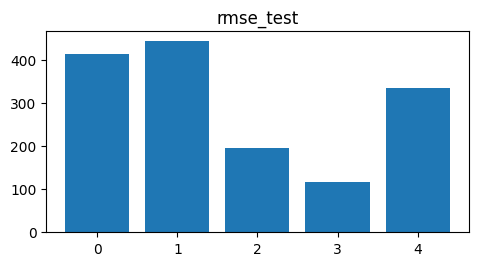

In [32]:


cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []


for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
    scaler = MinMaxScaler()
    print(tr,tt)
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)
    model = SVR().fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

                #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][1]='SVR'
data['RMSE test'][1]=np.mean(rmse_test_arr)
data['RMSE train'][1]=np.mean(rmse_train_arr)
data['RRMSE test'][1]=np.mean(np.array(rrmse_test_arr).astype(np.float64))
data['RRMSE train'][1]=np.mean(np.array(rrmse_train_arr).astype(np.float64))
data['MAE test'][1]=np.mean(mae_test_arr)
data['MAE train'][1]=np.mean(mae_train_arr)
data['R2_score test'][1]=np.mean(r2_test_arr)
data['R2_score train'][1]=np.mean(r2_train_arr)
data['Bias test'][1]=np.mean(bias_test_arr)
data['Bias train'][1]=np.mean(bias_train_arr)

plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 2)
# plt.title("rmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 3)
# plt.title("rrmse_test")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 4)
# plt.title("rrmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 5)
# plt.title("r2_test")
# plt.bar([x for x in [0,1,2,3,4]],[r2_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 6)
# plt.title("r2_train")
# plt.bar([x for x in [0,1,2,3,4]],[r2_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 7)
# plt.title("mae_test")
# plt.bar([x for x in [0,1,2,3,4]],[mae_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 8)
# plt.title("mae_train")
# plt.bar([x for x in [0,1,2,3,4]],[mae_train_arr[x] for x in [0,1,2,3,4]])
# plt.show()



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 22, 23] [17, 18, 20, 21, 24]

RMSE test:  718.392

RRMSE test:  19.43 %


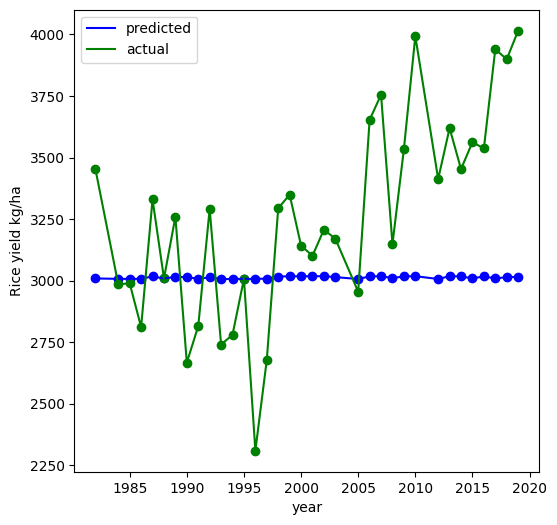

In [33]:
tr = [ 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7,  8,  9, 10, 11, 12, 13 ,14, 15, 16, 19, 22, 23]
tt = [17, 18, 20, 21, 24]
x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
model = SVR().fit(X_train, y_train)

x_ = df_test[selected_features_final]
y_ = df_test['prod']
y_pred_ = model.predict(scaler.transform(x_))

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")


x__=df[selected_features_final]
y__=df['prod']
y__pred__=model.predict(scaler.transform(x__))

plt.figure(figsize=(6,6))
plt.scatter(df['year'], y__pred__,color='b')
plt.plot(df['year'],y__pred__,color='b',label='predicted')
plt.scatter(df['year'],y__,color='g')
plt.plot(df['year'],y__,color='g',label='actual')
plt.xlabel("year")
plt.ylabel("Rice yield kg/ha")
plt.legend()
plt.show()


test_acc['Method'][1]='SVR'
test_acc['RMSE test'][1]=rmse_test
test_acc['RRMSE test'][1]=rrmse_test
test_acc['MAE test'][1]=float(format(mean_absolute_error(y_pred_, y_), '.3f'))
test_acc['R2_score test'][1]=r2_score(y_,y_pred_)
test_acc['Bias test'][1]=bias_value(y_,y_pred_)

##MLP

<BarContainer object of 5 artists>

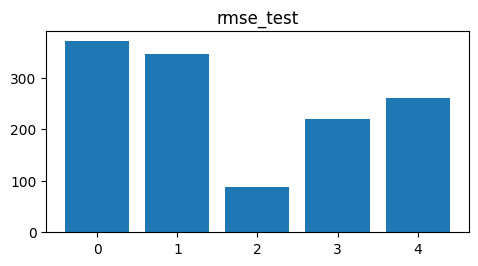

In [34]:

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []


for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)
    model = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

                #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][2]='MLP'
data['RMSE test'][2]=np.mean(rmse_test_arr)
data['RMSE train'][2]=np.mean(rmse_train_arr)
data['RRMSE test'][2]=np.mean(np.array(rrmse_test_arr).astype(np.float64))
data['RRMSE train'][2]=np.mean(np.array(rrmse_train_arr).astype(np.float64))
data['MAE test'][2]=np.mean(mae_test_arr)
data['MAE train'][2]=np.mean(mae_train_arr)
data['R2_score test'][2]=np.mean(r2_test_arr)
data['R2_score train'][2]=np.mean(r2_train_arr)
data['Bias test'][2]=np.mean(bias_test_arr)
data['Bias train'][2]=np.mean(bias_train_arr)

plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 2)
# plt.title("rmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 3)
# plt.title("rrmse_test")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 4)
# plt.title("rrmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 5)
# plt.title("r2_test")
# plt.bar([x for x in [0,1,2,3,4]],[r2_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 6)
# plt.title("r2_train")
# plt.bar([x for x in [0,1,2,3,4]],[r2_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 7)
# plt.title("mae_test")
# plt.bar([x for x in [0,1,2,3,4]],[mae_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 8)
# plt.title("mae_train")
# plt.bar([x for x in [0,1,2,3,4]],[mae_train_arr[x] for x in [0,1,2,3,4]])
# plt.show()



[0, 1, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24] [2, 3, 4, 12, 15]

RMSE test:  636.782

RRMSE test:  17.23 %


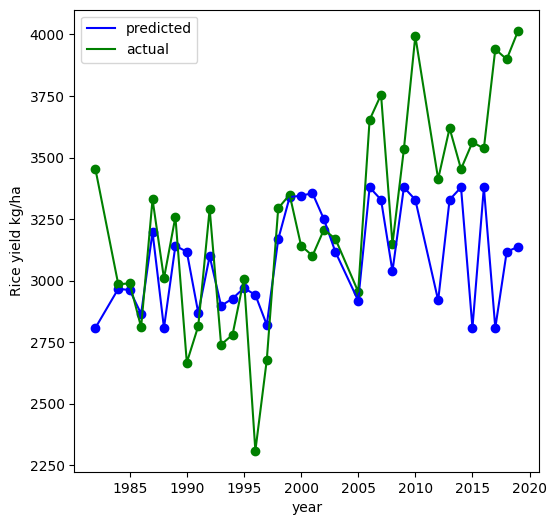

In [35]:
tr = [ 0 , 1,  5,  6,  7 , 8 , 9 ,10 ,11, 13, 14, 16, 17, 18 ,19 ,20, 21, 22 ,23 ,24]
tt = [ 2 ,3 , 4 ,12 ,15]
x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
model = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_train, y_train)


x_ = df_test[selected_features_final]
y_ = df_test['prod']
y_pred_ = model.predict(scaler.transform(x_))

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")


x__=df[selected_features_final]
y__=df['prod']
y__pred__=model.predict(scaler.transform(x__))

plt.figure(figsize=(6,6))
plt.scatter(df['year'], y__pred__,color='b')
plt.plot(df['year'],y__pred__,color='b',label='predicted')
plt.scatter(df['year'],y__,color='g')
plt.plot(df['year'],y__,color='g',label='actual')
plt.xlabel("year")
plt.ylabel("Rice yield kg/ha")
plt.legend()
plt.show()

test_acc['Method'][2]='MLP'
test_acc['RMSE test'][2]=rmse_test
test_acc['RRMSE test'][2]=rrmse_test
test_acc['MAE test'][2]=float(format(mean_absolute_error(y_pred_, y_), '.3f'))
test_acc['R2_score test'][2]=r2_score(y_,y_pred_)
test_acc['Bias test'][2]=bias_value(y_,y_pred_)

##KNN

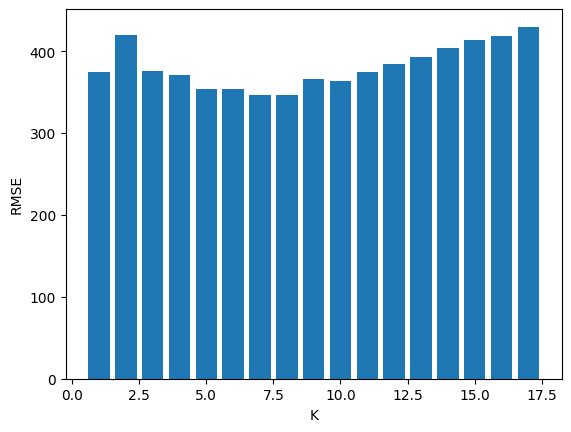

7


In [36]:
X=df_train[selected_features_final]
y=df_train['prod']

x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
K_min = 0
RMSE_min=math.inf
RMSE_list=[0 for t in range(len(x_train))]

for K in range(1,len(x_train)+1):
    model = neighbors.KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    rmse_test = float(format(np.sqrt(mean_squared_error(y_pred, y_test)), '.3f'))

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    RMSE_list[K-1]=rmse_test
    if RMSE_min > rmse_test:
      RMSE_min = rmse_test
      K_min = K
plt.bar(np.arange(1,len(x_train)+1), RMSE_list)
plt.xlabel("K")
plt.ylabel("RMSE")
plt.show()

print(K_min)

<BarContainer object of 5 artists>

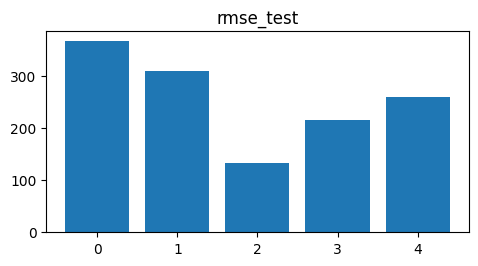

In [37]:


cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []


for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)

    model = neighbors.KNeighborsRegressor(n_neighbors = K_min).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

                #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][3]='KNN'
data['RMSE test'][3]=np.mean(rmse_test_arr)
data['RMSE train'][3]=np.mean(rmse_train_arr)
data['RRMSE test'][3]=np.mean(np.array(rrmse_test_arr).astype(np.float64))
data['RRMSE train'][3]=np.mean(np.array(rrmse_train_arr).astype(np.float64))
data['MAE test'][3]=np.mean(mae_test_arr)
data['MAE train'][3]=np.mean(mae_train_arr)
data['R2_score test'][3]=np.mean(r2_test_arr)
data['R2_score train'][3]=np.mean(r2_train_arr)
data['Bias test'][3]=np.mean(bias_test_arr)
data['Bias train'][3]=np.mean(bias_train_arr)

plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 2)
# plt.title("rmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 3)
# plt.title("rrmse_test")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 4)
# plt.title("rrmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 5)
# plt.title("r2_test")
# plt.bar([x for x in [0,1,2,3,4]],[r2_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 6)
# plt.title("r2_train")
# plt.bar([x for x in [0,1,2,3,4]],[r2_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 7)
# plt.title("mae_test")
# plt.bar([x for x in [0,1,2,3,4]],[mae_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 8)
# plt.title("mae_train")
# plt.bar([x for x in [0,1,2,3,4]],[mae_train_arr[x] for x in [0,1,2,3,4]])
# plt.show()



[0, 1, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24] [2, 3, 4, 12, 15]

RMSE test:  625.758

RRMSE test:  16.93 %


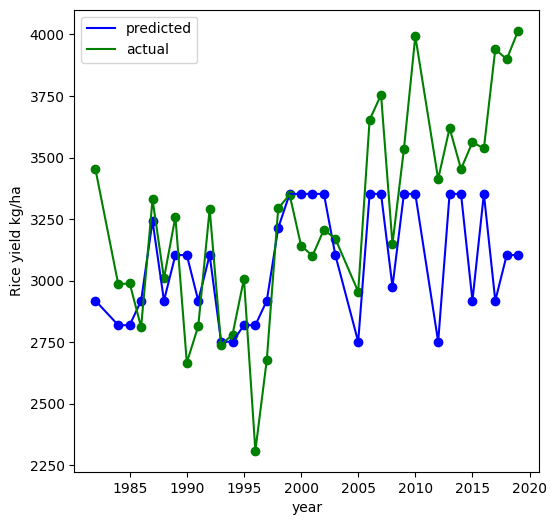

In [38]:
tr = [ 0 , 1,  5,  6,  7 , 8 , 9 ,10 ,11, 13, 14, 16, 17, 18 ,19 ,20, 21, 22 ,23 ,24]
tt = [ 2 ,3 , 4 ,12 ,15]
x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

model = neighbors.KNeighborsRegressor(n_neighbors = K_min).fit(X_train, y_train)

x_ = df_test[selected_features_final]
y_ = df_test['prod']
y_pred_ = model.predict(scaler.transform(x_))

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")

x__=df[selected_features_final]
y__=df['prod']
y__pred__=model.predict(scaler.transform(x__))

plt.figure(figsize=(6,6))
plt.scatter(df['year'], y__pred__,color='b')
plt.plot(df['year'],y__pred__,color='b',label='predicted')
plt.scatter(df['year'],y__,color='g')
plt.plot(df['year'],y__,color='g',label='actual')
plt.xlabel("year")
plt.ylabel("Rice yield kg/ha")
plt.legend()
plt.savefig("KY_KNN_full.jpg",dpi=1200)
plt.show()

test_acc['Method'][3]='KNN'
test_acc['RMSE test'][3]=rmse_test
test_acc['RRMSE test'][3]=rrmse_test
test_acc['MAE test'][3]=float(format(mean_absolute_error(y_pred_, y_), '.3f'))
test_acc['R2_score test'][3]=r2_score(y_,y_pred_)
test_acc['Bias test'][3]=bias_value(y_,y_pred_)

##Random Forest

In [39]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []

for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
    print(tr,tt)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(pd.DataFrame(x_train))
    X_test = scaler.transform(pd.DataFrame(x_test))
    model =  RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

    #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][4]='Random Forest'
data['RMSE test'][4]=np.mean(rmse_test_arr)
data['RMSE train'][4]=np.mean(rmse_train_arr)
data['RRMSE test'][4]=np.mean(np.array(rrmse_test_arr).astype(np.float64))
data['RRMSE train'][4]=np.mean(np.array(rrmse_train_arr).astype(np.float64))
data['MAE test'][4]=np.mean(mae_test_arr)
data['MAE train'][4]=np.mean(mae_train_arr)
data['R2_score test'][4]=np.mean(r2_test_arr)
data['R2_score train'][4]=np.mean(r2_train_arr)
data['Bias test'][4]=np.mean(bias_test_arr)
data['Bias train'][4]=np.mean(bias_train_arr)

print(np.array(rmse_test_arr).astype(np.float64))
print(sum(np.array(rmse_test_arr))/5)
x_train, x_test = df_train[selected_features_final], df_test[selected_features_final]
y_train, y_test = df_train['prod'], df_test['prod']

X_train = scaler.fit_transform(pd.DataFrame(x_train))
X_test = scaler.transform(pd.DataFrame(x_test))
#model =  RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)
y_pred= model.predict(X_test)
rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse_test)

[ 1  2  3  4  5  6  7  9 10 12 13 14 15 17 18 19 20 21 22 24] [ 0  8 11 16 23]
[ 0  2  3  4  6  7  8 10 11 12 14 15 16 17 18 19 20 21 23 24] [ 1  5  9 13 22]
[ 0  1  5  6  7  8  9 10 11 13 14 16 17 18 19 20 21 22 23 24] [ 2  3  4 12 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 19 22 23] [17 18 20 21 24]
[ 0  1  2  3  4  5  8  9 11 12 13 15 16 17 18 20 21 22 23 24] [ 6  7 10 14 19]
[363.7   369.52  158.208 265.554 351.309]
301.65819999999997
482.327


[0, 1, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24] [2, 3, 4, 12, 15]

RMSE test:  532.589

RRMSE test:  14.41 %


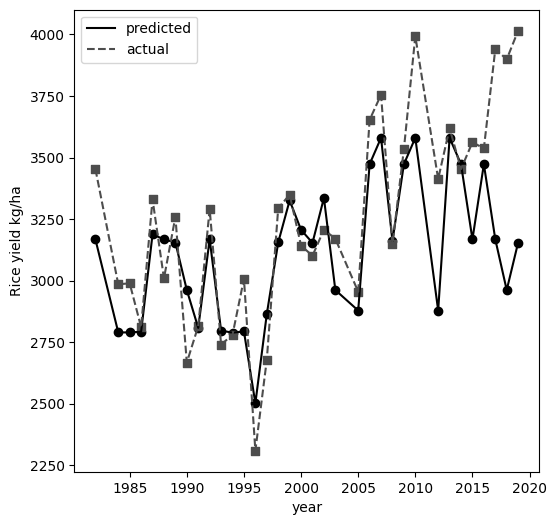

In [40]:
tr = [ 0 , 1,  5,  6,  7 , 8 , 9 ,10 ,11, 13, 14, 16, 17, 18 ,19 ,20, 21, 22 ,23 ,24]
tt = [ 2 ,3 , 4 ,12 ,15]
x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
model =  RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)

x_ = df_test[selected_features_final]
y_ = df_test['prod']
y_pred_ = model.predict(scaler.transform(x_))

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")


x__=df[selected_features_final]
y__=df['prod']
y__pred__=model.predict(scaler.transform(x__))

plt.figure(figsize=(6,6))
plt.scatter(df['year'], y__pred__,color='k')
plt.plot(df['year'],y__pred__,color='k',label='predicted')
plt.scatter(df['year'],y__,color='0.3', marker='s')
plt.plot(df['year'],y__,color='0.3',label='actual',linestyle='dashed')
plt.xlabel("year")
plt.ylabel("Rice yield kg/ha")
plt.legend()
plt.savefig("KY_RF_full.jpg",dpi=1200)
plt.show()

test_acc['Method'][4]='RF'
test_acc['RMSE test'][4]=rmse_test
test_acc['RRMSE test'][4]=rrmse_test
test_acc['MAE test'][4]=float(format(mean_absolute_error(y_pred_, y_), '.3f'))
test_acc['R2_score test'][4]=r2_score(y_,y_pred_)
test_acc['Bias test'][4]=bias_value(y_,y_pred_)

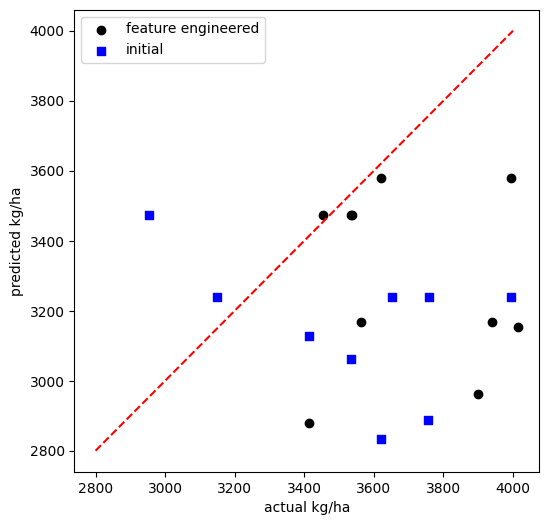

In [41]:

plt.figure(figsize=(6,6))
plt.scatter(y_, y_pred_,color='k',label='feature engineered')
plt.scatter([2955.00, 3653.00, 3755.00, 3148.00, 3534.00, 3993.00, 3757.57, 3412.75, 3619.16], [3473.652, 3240.411, 2887.077, 3240.411, 3062.649, 3240.411, 3240.411, 3129.165, 2832.712],color='b',label='initial', marker='s')
plt.plot([2800, 4000], [2800, 4000], color='red', linestyle='--')
plt.xlabel("actual kg/ha")
plt.ylabel("predicted kg/ha")
plt.legend()
plt.savefig("KY_RF_pred.jpg",dpi=1200)

plt.show()

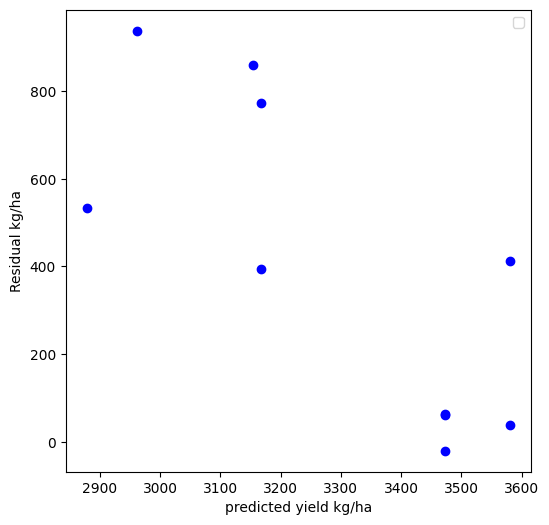

In [42]:
x_val = df_test[selected_features_final]
y_val = df_test['prod']
y_pred_val = model.predict(scaler.transform(x_val))

plt.figure(figsize=(6,6))
plt.scatter(y_pred_val, y_val-y_pred_val, color='b')
#plt.plot(df_test['year'], y_-y_pred_,color='b')
plt.xlabel("predicted yield kg/ha")
plt.ylabel("Residual kg/ha")
plt.legend()
plt.savefig("KY_RF_res.jpg",dpi=1200)

plt.show()

# Results

In [43]:
df_train = pd.DataFrame(data, columns = ['Method', 'RMSE test','RMSE train','RRMSE test','RRMSE train','MAE test','MAE train','R2_score test','R2_score train','Bias test','Bias train'])
print("dataset: ", dataset)
print("test size : ",test_size,",", test_size*100/len(df.index),"%")
print(df_train)

dataset:  Kurunegala yala kannaya
test size :  10 , 28.571428571428573 %
              Method  RMSE test  RMSE train  RRMSE test  RRMSE train  \
0  Linear Regression   256.2128    249.0210       8.316        8.094   
1                SVR   300.7232    314.8746       9.786       10.236   
2                MLP   256.8892    248.8570       8.338        8.088   
3                KNN   257.5178    236.0546       8.358        7.674   
4      Random Forest   301.6582    126.5108       9.828        4.112   

   MAE test  MAE train  R2_score test  R2_score train  Bias test    Bias train  
0  192.3728   179.1372      -1.154093        0.376682  -6.773030  9.094947e-15  
1  263.0356   246.9512      -0.411670        0.006557  -7.264710 -7.370390e+00  
2  193.1378   178.9546      -1.155499        0.377642  -6.051441  3.380729e-02  
3  206.2116   181.7916      -1.138396        0.437404  27.960000  2.068000e+01  
4  249.7424    95.0060      -2.159932        0.836041  22.623738  8.713952e+00  


In [44]:
test_acc_df = pd.DataFrame(test_acc, columns = ['Method', 'RMSE test','RRMSE test','MAE test', 'R2_score test','Bias test'])
print(test_acc_df)

              Method  RMSE test RRMSE test  MAE test  R2_score test  \
0  Linear Regression    636.791      17.23   538.110      -7.023732   
1                SVR    718.392      19.43   682.442      -9.211878   
2                MLP    636.782      17.23   538.137      -7.023516   
3                KNN    625.758      16.93   540.691      -6.748122   
4                 RF    532.589      14.41   409.589      -4.612639   

    Bias test  
0  538.109720  
1  682.442218  
2  538.137149  
3  540.691103  
4  405.615645  


In [45]:
df_train.to_csv(r'KY_feature_engineered_train.csv', index = False, header=True)
test_acc_df.to_csv(r'KY_feature_engineered_test.csv',index=False, header=True)